<a href="https://colab.research.google.com/github/jnelly79/Colorado_Solar_Installation_Adoption_Rates_DS/blob/master/exploring_data/exploring_solar_energy_demographic_counties_CO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import pandas and visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the county demographic solar estimates data for Colorado.
df = pd.read_excel('/content/drive/My Drive/datasets/data_practicum/county_demographic_solar_data_est.xlsx', sheet_name='cleaned')

In [ ]:
# Display the dataframe head.
df.head()

,CFIPS,YEAR,COUNTY,Households,total_roofs_installed,total_est_roofs,total_est_sqft_of_overall_roofs,total_est_capacity_of_mW_dc,total_est_MWh_ac_per_year,total_est_median_roof_space,total_est_median_kW_dc_capacity,total_est_median_kWH_ac_per_year,total_est_carbon_metric_tons,total_est_cars_off_road__per_yr,total_est_number_tree_seedlings_grown_10_yrs
0,1,2017,Adams County,168930,2200,117000,144000000,2000,2900000,5640,80,11500,1800000,375000,45500000
1,5,2017,Arapahoe County,250210,3400,146000,168000000,2400,3400000,5990,85,12400,2100000,441000,53500000
2,13,2017,Boulder County,130376,3800,44600,52900000,750,996000,5290,75,10200,606000,128000,15500000
3,14,2017,Broomfield County,26120,685,18200,23200000,330,452000,7220,103,14200,275000,58100,7100000
4,31,2017,Denver County,310900,3600,129000,171000000,2400,3400000,4400,63,9000,2100000,443000,53700000


In [ ]:
# Display the dataframe shape.
df.shape

(17, 15)

In [ ]:
# Display the dataframe info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   CFIPS                                         17 non-null     int64 
 1   YEAR                                          17 non-null     int64 
 2   COUNTY                                        17 non-null     object
 3   Households                                    17 non-null     int64 
 4   total_roofs_installed                         17 non-null     int64 
 5   total_est_roofs                               17 non-null     int64 
 6   total_est_sqft_of_overall_roofs               17 non-null     int64 
 7   total_est_capacity_of_mW_dc                   17 non-null     int64 
 8   total_est_MWh_ac_per_year                     17 non-null     int64 
 9   total_est_median_roof_space                   17 non-null     int64 
 10  tota

In [ ]:
# Display the dataframe basic statistics.
df.describe()

,CFIPS,YEAR,Households,total_roofs_installed,total_est_roofs,total_est_sqft_of_overall_roofs,total_est_capacity_of_mW_dc,total_est_MWh_ac_per_year,total_est_median_roof_space,total_est_median_kW_dc_capacity,total_est_median_kWH_ac_per_year,total_est_carbon_metric_tons,total_est_cars_off_road__per_yr,total_est_number_tree_seedlings_grown_10_yrs
count,17.000000,17.0,17.000000,17.000000,17.000000,1.700000e+01,17.000000,1.700000e+01,17.000000,17.000000,17.000000,1.700000e+01,17.000000,1.700000e+01
mean,56.588235,2017.0,112048.529412,1402.411765,88058.823529,1.133412e+08,1608.294118,2.184235e+06,6777.647059,96.352941,13494.117647,1.420059e+06,298935.294118,3.626471e+07
std,39.024125,0.0,103441.427293,1547.104031,58608.383134,7.933167e+07,1122.135061,1.490720e+06,1247.445036,17.779698,3168.491476,1.042335e+06,218889.880822,2.655384e+07
min,1.000000,2017.0,350.000000,18.000000,13900.000000,2.150000e+07,304.000000,4.520000e+05,4400.000000,63.000000,9000.000000,1.490000e+05,31500.000000,3.800000e+06
25%,31.000000,2017.0,21378.000000,150.000000,43300.000000,5.290000e+07,750.000000,9.960000e+05,5990.000000,85.000000,11500.000000,6.060000e+05,128000.000000,1.550000e+07
50%,57.000000,2017.0,107744.000000,756.000000,84100.000000,9.570000e+07,1400.000000,1.800000e+06,6870.000000,98.000000,13300.000000,1.100000e+06,235000.000000,2.850000e+07
75%,77.000000,2017.0,168930.000000,2200.000000,140000.000000,1.710000e+08,2400.000000,3.400000e+06,7750.000000,110.000000,15400.000000,2.100000e+06,443000.000000,5.370000e+07
max,123.000000,2017.0,310900.000000,4700.000000,169000.000000,2.490000e+08,3500.000000,4.700000e+06,9340.000000,133.000000,21900.000000,3.300000e+06,694000.000000,8.420000e+07


(array([4., 4., 0., 1., 1., 1., 2., 1., 2., 1.]),
 array([ 149000.,  464100.,  779200., 1094300., 1409400., 1724500.,
        2039600., 2354700., 2669800., 2984900., 3300000.]),
 <a list of 10 Patch objects>)

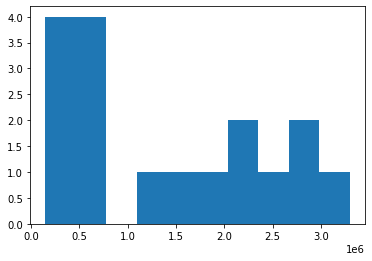

In [ ]:
# Plot a histogram of total estimated alleviated carbon metric tons.
n_bins = 10
plt.hist(df['total_est_carbon_metric_tons'], n_bins)

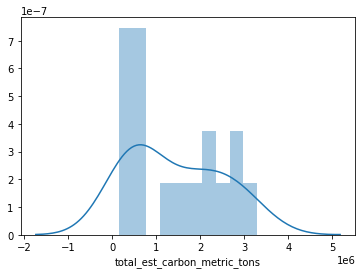

In [ ]:
# Plot a distribution plot of total estimated alleviated carbon metric tons.
sns.distplot(df['total_est_carbon_metric_tons'], bins=10)

In [ ]:
# Select only float64 and int64 Dtypes.
solar_num = df.select_dtypes(include=['float64','int64'])
solar_num.head()

,CFIPS,YEAR,Households,total_roofs_installed,total_est_roofs,total_est_sqft_of_overall_roofs,total_est_capacity_of_mW_dc,total_est_MWh_ac_per_year,total_est_median_roof_space,total_est_median_kW_dc_capacity,total_est_median_kWH_ac_per_year,total_est_carbon_metric_tons,total_est_cars_off_road__per_yr,total_est_number_tree_seedlings_grown_10_yrs
0,1,2017,168930,2200,117000,144000000,2000,2900000,5640,80,11500,1800000,375000,45500000
1,5,2017,250210,3400,146000,168000000,2400,3400000,5990,85,12400,2100000,441000,53500000
2,13,2017,130376,3800,44600,52900000,750,996000,5290,75,10200,606000,128000,15500000
3,14,2017,26120,685,18200,23200000,330,452000,7220,103,14200,275000,58100,7100000
4,31,2017,310900,3600,129000,171000000,2400,3400000,4400,63,9000,2100000,443000,53700000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35755d43c8>,
      dtype=object)

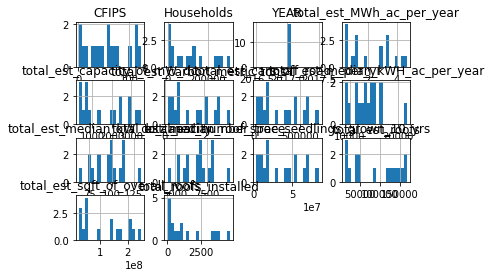

In [ ]:
# Display histograms for all of the features.
solar_num.hist(bins=20)

In [ ]:
# Get correlation on variables of interest.
sun_hour_cor = solar_num.corr()['total_est_carbon_metric_tons'][:-1]

In [ ]:
# Display correlation.
sun_hour_cor

CFIPS                              -0.031328
YEAR                                     NaN
Households                          0.196321
total_roofs_installed               0.115842
total_est_roofs                     0.961266
total_est_sqft_of_overall_roofs     0.997313
total_est_capacity_of_mW_dc         0.996228
total_est_MWh_ac_per_year           0.984821
total_est_median_roof_space        -0.388978
total_est_median_kW_dc_capacity    -0.389856
total_est_median_kWH_ac_per_year   -0.463316
total_est_carbon_metric_tons        1.000000
total_est_cars_off_road__per_yr     0.999919
Name: total_est_carbon_metric_tons, dtype: float64

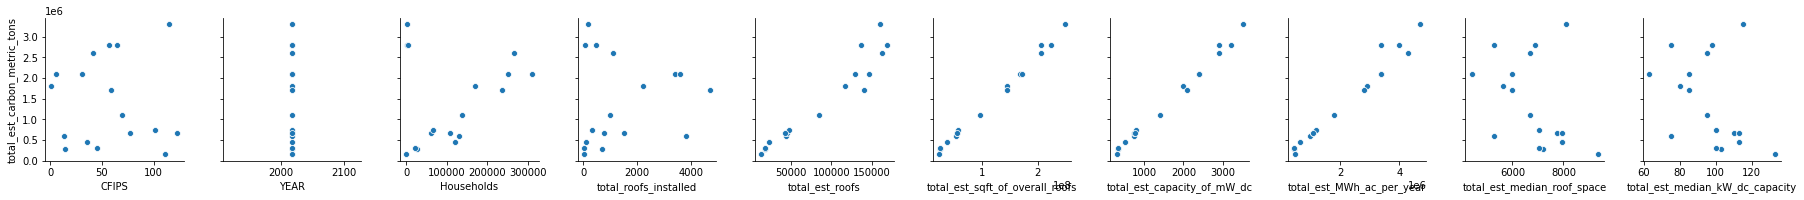

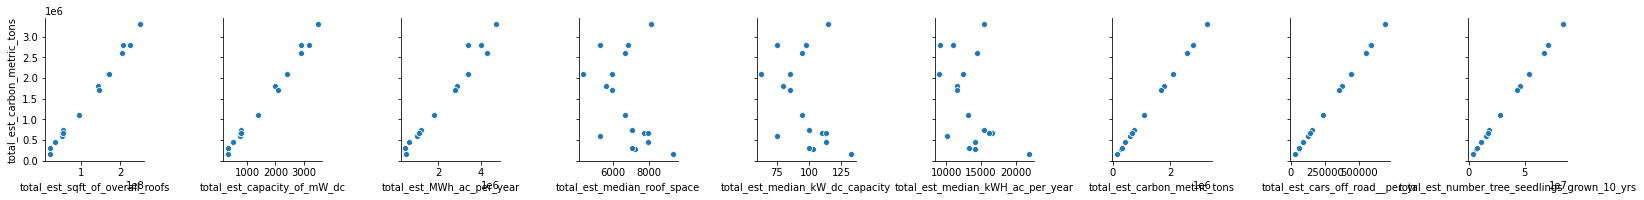

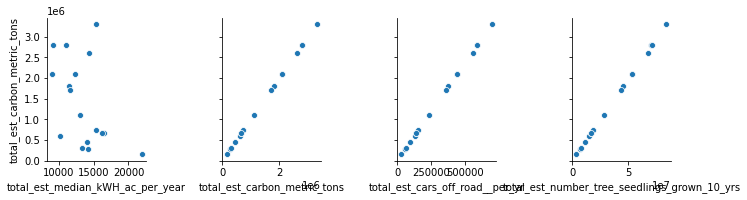

In [ ]:
# Plot scatter plots of the correlations using pairplot
for i in range(0,len(solar_num.columns),5):
  sns.pairplot(solar_num, y_vars=['total_est_carbon_metric_tons'],x_vars=solar_num.columns[i:i+10])

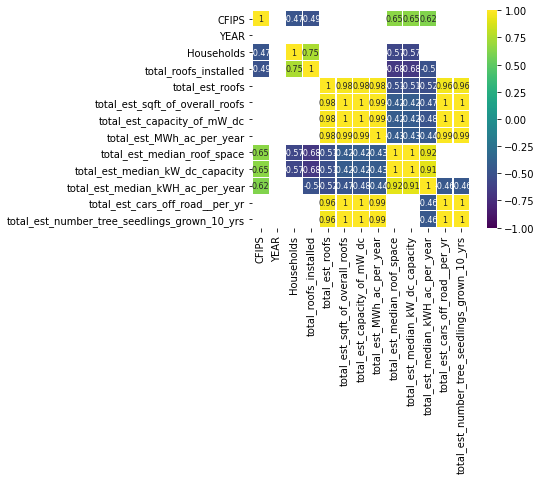

In [ ]:
# Plotting significant correlation in heatmap
corr = solar_num.drop('total_est_carbon_metric_tons',axis=1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size":8}, square=True);

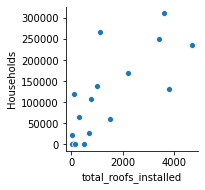

In [ ]:
# Plot a correlation plot between households and total_installed_roofs
sns.pairplot(solar_num, y_vars=['Households'],x_vars=['total_roofs_installed'])